## SDSS Quasar catalog example

Let's explore a catalog of 100,000 quasars (supermassive black holes in the centers of galaxies) from the Sloan Digital Sky Survey (SDSS).  [Catalog documentation](http://das.sdss.org/va/qso_properties_dr7/dr7.htm)

In [30]:
import pandas
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.utils.data import download_file
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
SDSS_QSO_file = "http://das.sdss.org/va/qso_properties_dr7/data/catalogs/dr7_bh_June_2010.fits.gz"
tab = Table.read(SDSS_QSO_file) #using Astropy Tables as an intermediary in reading

In [32]:
pandas.set_option('display.max_columns', 500)  # print all columns in .head()
df = tab.to_pandas() # 
df.head(2)

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,MI_Z2,LOGLBOL,LOGLBOL_ERR,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL5100,LOGL5100_ERR,LOGL3000,LOGL3000_ERR,LOGL1350,LOGL1350_ERR,LOGL_BROAD_HA,LOGL_BROAD_HA_ERR,FWHM_BROAD_HA,FWHM_BROAD_HA_ERR,EW_BROAD_HA,EW_BROAD_HA_ERR,LOGL_NARROW_HA,LOGL_NARROW_HA_ERR,FWHM_NARROW_HA,FWHM_NARROW_HA_ERR,EW_NARROW_HA,EW_NARROW_HA_ERR,LOGL_NII_6585,LOGL_NII_6585_ERR,EW_NII_6585,EW_NII_6585_ERR,LOGL_SII_6718,LOGL_SII_6718_ERR,EW_SII_6718,EW_SII_6718_ERR,LOGL_SII_6732,LOGL_SII_6732_ERR,EW_SII_6732,EW_SII_6732_ERR,EW_FE_HA,EW_FE_HA_ERR,ALPHA_HA,ALPHA_HA_ERR,LINE_NPIX_HA,LINE_MED_SN_HA,LINE_REDCHI2_HA,LOGL_BROAD_HB,LOGL_BROAD_HB_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,EW_BROAD_HB,EW_BROAD_HB_ERR,LOGL_NARROW_HB,LOGL_NARROW_HB_ERR,FWHM_NARROW_HB,FWHM_NARROW_HB_ERR,EW_NARROW_HB,EW_NARROW_HB_ERR,FWHM_BROAD_HB_1GAUSS,LOGL_OIII_4959,LOGL_OIII_4959_ERR,EW_OIII_4959,EW_OIII_4959_ERR,LOGL_OIII_5007,LOGL_OIII_5007_ERR,EW_OIII_5007,EW_OIII_5007_ERR,EW_FE_HB_4434_4684,EW_FE_HB_4434_4684_ERR,ALPHA_HB,ALPHA_HB_ERR,LINE_NPIX_HB,LINE_MED_SN_HB,LINE_REDCHI2_HB,LOGL_MGII,LOGL_MGII_ERR,FWHM_MGII,FWHM_MGII_ERR,EW_MGII,EW_MGII_ERR,LOGL_BROAD_MGII,LOGL_BROAD_MGII_ERR,FWHM_BROAD_MGII,FWHM_BROAD_MGII_ERR,EW_BROAD_MGII,EW_BROAD_MGII_ERR,FWHM_BROAD_MGII_1GAUSS,EW_FE_MGII,EW_FE_MGII_ERR,ALPHA_MGII,ALPHA_MGII_ERR,LINE_NPIX_MGII,LINE_MED_SN_MGII,LINE_REDCHI2_MGII,LOGL_CIV,LOGL_CIV_ERR,FWHM_CIV,FWHM_CIV_ERR,EW_CIV,EW_CIV_ERR,ALPHA_CIV,ALPHA_CIV_ERR,LINE_NPIX_CIV,LINE_MED_SN_CIV,LINE_REDCHI2_CIV,VOFF_BROAD_HA,VOFF_BROAD_HA_ERR,VOFF_NARROW_HA,VOFF_NARROW_HA_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,VOFF_NARROW_HB,VOFF_NARROW_HB_ERR,VOFF_BROAD_MGII,VOFF_BROAD_MGII_ERR,VOFF_CIV_PEAK,VOFF_CIV_PEAK_ERR,LOGBH_HB_MD04,LOGBH_HB_MD04_ERR,LOGBH_HB_VP06,LOGBH_HB_VP06_ERR,LOGBH_MGII_MD04,LOGBH_MGII_MD04_ERR,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
0,000006.53+003055.2,0.027228,0.515341,1.8246,685,467,52203,34603008,1,0,-25.386491,46.035774,0.036962,0,0,0.0,-27.601836,-1.0,0.0,-1.0,45.323967,0.036962,45.601562,0.029627,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,43.623726,0.065857,3954.809260,2410.850570,52.711408,7.691093,43.586836,0.059084,7273.248958,1605.919261,48.418843,7.175982,7672.022480,175.053589,49.486535,-1.822980,0.223362,310,3.551944,1.139660,44.139111,0.069328,7587.324219,1178.496826,57.704432,11.289974,-1.551489,0.521253,280,5.022898,0.858506,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,-244.412281,695.623302,936.428829,240.337932,0.0,-1.0,0.0,-1.0,9.095829,0.107268,8.716234,0.529814,9.284316,0.193147,9.269005,0.135824,9.284316,0.193147,-1.348913,0
1,000008.13+001634.6,0.033900,0.276301,1.8373,685,470,52203,1048576,1,0,-26.104771,46.376326,0.012669,0,0,0.0,-27.349089,-1.0,0.0,-1.0,45.664519,0.012669,45.661184,0.024625,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,43.850527,0.064163,4997.339878,1150.632174,43.603290,7.182757,43.844508,0.070650,4997.339878,990.432504,43.003237,7.518504,6977.679851,86.297289,17.621219,-0.782886,0.076702,311,6.019619,1.152218,44.229293,0.051452,3020.732910,229.937866,61.306315,7.474729,-1.450084,0.418789,269,5.305103,1.121318,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,-49.628040,428.381651,284.352792,80.284566,0.0,-1.0,0.0,-1.0,9.224574,0.068609,9.089737,0.200092,9.169480,0.172326,8.500652,0.067393,9.169480,0.172326,-0.893524,0


In [33]:
# Replace default index w scientifically-meaningful one
df.set_index('SDSS_NAME', inplace=True)  
df.head(2)

,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,MI_Z2,LOGLBOL,LOGLBOL_ERR,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL5100,LOGL5100_ERR,LOGL3000,LOGL3000_ERR,LOGL1350,LOGL1350_ERR,LOGL_BROAD_HA,LOGL_BROAD_HA_ERR,FWHM_BROAD_HA,FWHM_BROAD_HA_ERR,EW_BROAD_HA,EW_BROAD_HA_ERR,LOGL_NARROW_HA,LOGL_NARROW_HA_ERR,FWHM_NARROW_HA,FWHM_NARROW_HA_ERR,EW_NARROW_HA,EW_NARROW_HA_ERR,LOGL_NII_6585,LOGL_NII_6585_ERR,EW_NII_6585,EW_NII_6585_ERR,LOGL_SII_6718,LOGL_SII_6718_ERR,EW_SII_6718,EW_SII_6718_ERR,LOGL_SII_6732,LOGL_SII_6732_ERR,EW_SII_6732,EW_SII_6732_ERR,EW_FE_HA,EW_FE_HA_ERR,ALPHA_HA,ALPHA_HA_ERR,LINE_NPIX_HA,LINE_MED_SN_HA,LINE_REDCHI2_HA,LOGL_BROAD_HB,LOGL_BROAD_HB_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,EW_BROAD_HB,EW_BROAD_HB_ERR,LOGL_NARROW_HB,LOGL_NARROW_HB_ERR,FWHM_NARROW_HB,FWHM_NARROW_HB_ERR,EW_NARROW_HB,EW_NARROW_HB_ERR,FWHM_BROAD_HB_1GAUSS,LOGL_OIII_4959,LOGL_OIII_4959_ERR,EW_OIII_4959,EW_OIII_4959_ERR,LOGL_OIII_5007,LOGL_OIII_5007_ERR,EW_OIII_5007,EW_OIII_5007_ERR,EW_FE_HB_4434_4684,EW_FE_HB_4434_4684_ERR,ALPHA_HB,ALPHA_HB_ERR,LINE_NPIX_HB,LINE_MED_SN_HB,LINE_REDCHI2_HB,LOGL_MGII,LOGL_MGII_ERR,FWHM_MGII,FWHM_MGII_ERR,EW_MGII,EW_MGII_ERR,LOGL_BROAD_MGII,LOGL_BROAD_MGII_ERR,FWHM_BROAD_MGII,FWHM_BROAD_MGII_ERR,EW_BROAD_MGII,EW_BROAD_MGII_ERR,FWHM_BROAD_MGII_1GAUSS,EW_FE_MGII,EW_FE_MGII_ERR,ALPHA_MGII,ALPHA_MGII_ERR,LINE_NPIX_MGII,LINE_MED_SN_MGII,LINE_REDCHI2_MGII,LOGL_CIV,LOGL_CIV_ERR,FWHM_CIV,FWHM_CIV_ERR,EW_CIV,EW_CIV_ERR,ALPHA_CIV,ALPHA_CIV_ERR,LINE_NPIX_CIV,LINE_MED_SN_CIV,LINE_REDCHI2_CIV,VOFF_BROAD_HA,VOFF_BROAD_HA_ERR,VOFF_NARROW_HA,VOFF_NARROW_HA_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,VOFF_NARROW_HB,VOFF_NARROW_HB_ERR,VOFF_BROAD_MGII,VOFF_BROAD_MGII_ERR,VOFF_CIV_PEAK,VOFF_CIV_PEAK_ERR,LOGBH_HB_MD04,LOGBH_HB_MD04_ERR,LOGBH_HB_VP06,LOGBH_HB_VP06_ERR,LOGBH_MGII_MD04,LOGBH_MGII_MD04_ERR,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
SDSS_NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000006.53+003055.2,0.027228,0.515341,1.8246,685,467,52203,34603008,1,0,-25.386491,46.035774,0.036962,0,0,0.0,-27.601836,-1.0,0.0,-1.0,45.323967,0.036962,45.601562,0.029627,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,43.623726,0.065857,3954.809260,2410.850570,52.711408,7.691093,43.586836,0.059084,7273.248958,1605.919261,48.418843,7.175982,7672.022480,175.053589,49.486535,-1.822980,0.223362,310,3.551944,1.139660,44.139111,0.069328,7587.324219,1178.496826,57.704432,11.289974,-1.551489,0.521253,280,5.022898,0.858506,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,-244.412281,695.623302,936.428829,240.337932,0.0,-1.0,0.0,-1.0,9.095829,0.107268,8.716234,0.529814,9.284316,0.193147,9.269005,0.135824,9.284316,0.193147,-1.348913,0
000008.13+001634.6,0.033900,0.276301,1.8373,685,470,52203,1048576,1,0,-26.104771,46.376326,0.012669,0,0,0.0,-27.349089,-1.0,0.0,-1.0,45.664519,0.012669,45.661184,0.024625,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.0,-1.0,0,0.0,-1.0,43.850527,0.064163,4997.339878,1150.632174,43.603290,7.182757,43.844508,0.070650,4997.339878,990.432504,43.003237,7.518504,6977.679851,86.297289,17.621219,-0.782886,0.076702,311,6.019619,1.152218,44.229293,0.051452,3020.732910,229.937866,61.306315,7.474729,-1.450084,0.418789,269,5.305103,1.121318,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,300000.0,-1.0,-49.628040,428.381651,284.352792,80.284566,0.0,-1.0,0.0,-1.0,9

In [34]:
df.shape  # This is a big table: 1E5 QSOs

(105783, 141)

In [40]:
# Let's bin by redshift and calculate median quantities
zbins = np.arange(0.0, 5.5, 0.5)
print zbins
df_medians = df.groupby(pandas.cut(df['REDSHIFT'], zbins)).median()
print df_medians['LOGEDD_RATIO']
df_medians.head()

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]
REDSHIFT
(0, 0.5]   -1.062316
(0.5, 1]   -0.903666
(1, 1.5]   -0.798323
(1.5, 2]   -0.714199
(2, 2.5]   -0.607189
(2.5, 3]   -0.531942
(3, 3.5]   -0.523691
(3.5, 4]   -0.515452
(4, 4.5]   -0.557537
(4.5, 5]   -0.889539
Name: LOGEDD_RATIO, dtype: float64


,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,MI_Z2,LOGLBOL,LOGLBOL_ERR,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL5100,LOGL5100_ERR,LOGL3000,LOGL3000_ERR,LOGL1350,LOGL1350_ERR,LOGL_BROAD_HA,LOGL_BROAD_HA_ERR,FWHM_BROAD_HA,FWHM_BROAD_HA_ERR,EW_BROAD_HA,EW_BROAD_HA_ERR,LOGL_NARROW_HA,LOGL_NARROW_HA_ERR,FWHM_NARROW_HA,FWHM_NARROW_HA_ERR,EW_NARROW_HA,EW_NARROW_HA_ERR,LOGL_NII_6585,LOGL_NII_6585_ERR,EW_NII_6585,EW_NII_6585_ERR,LOGL_SII_6718,LOGL_SII_6718_ERR,EW_SII_6718,EW_SII_6718_ERR,LOGL_SII_6732,LOGL_SII_6732_ERR,EW_SII_6732,EW_SII_6732_ERR,EW_FE_HA,EW_FE_HA_ERR,ALPHA_HA,ALPHA_HA_ERR,LINE_NPIX_HA,LINE_MED_SN_HA,LINE_REDCHI2_HA,LOGL_BROAD_HB,LOGL_BROAD_HB_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,EW_BROAD_HB,EW_BROAD_HB_ERR,LOGL_NARROW_HB,LOGL_NARROW_HB_ERR,FWHM_NARROW_HB,FWHM_NARROW_HB_ERR,EW_NARROW_HB,EW_NARROW_HB_ERR,FWHM_BROAD_HB_1GAUSS,LOGL_OIII_4959,LOGL_OIII_4959_ERR,EW_OIII_4959,EW_OIII_4959_ERR,LOGL_OIII_5007,LOGL_OIII_5007_ERR,EW_OIII_5007,EW_OIII_5007_ERR,EW_FE_HB_4434_4684,EW_FE_HB_4434_4684_ERR,ALPHA_HB,ALPHA_HB_ERR,LINE_NPIX_HB,LINE_MED_SN_HB,LINE_REDCHI2_HB,LOGL_MGII,LOGL_MGII_ERR,FWHM_MGII,FWHM_MGII_ERR,EW_MGII,EW_MGII_ERR,LOGL_BROAD_MGII,LOGL_BROAD_MGII_ERR,FWHM_BROAD_MGII,FWHM_BROAD_MGII_ERR,EW_BROAD_MGII,EW_BROAD_MGII_ERR,FWHM_BROAD_MGII_1GAUSS,EW_FE_MGII,EW_FE_MGII_ERR,ALPHA_MGII,ALPHA_MGII_ERR,LINE_NPIX_MGII,LINE_MED_SN_MGII,LINE_REDCHI2_MGII,LOGL_CIV,LOGL_CIV_ERR,FWHM_CIV,FWHM_CIV_ERR,EW_CIV,EW_CIV_ERR,ALPHA_CIV,ALPHA_CIV_ERR,LINE_NPIX_CIV,LINE_MED_SN_CIV,LINE_REDCHI2_CIV,VOFF_BROAD_HA,VOFF_BROAD_HA_ERR,VOFF_NARROW_HA,VOFF_NARROW_HA_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,VOFF_NARROW_HB,VOFF_NARROW_HB_ERR,VOFF_BROAD_MGII,VOFF_BROAD_MGII_ERR,VOFF_CIV_PEAK,VOFF_CIV_PEAK_ERR,LOGBH_HB_MD04,LOGBH_HB_MD04_ERR,LOGBH_HB_VP06,LOGBH_HB_VP06_ERR,LOGBH_MGII_MD04,LOGBH_MGII_MD04_ERR,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
REDSHIFT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 0.5]",181.304123,24.626175,0.37110,1320.5,328.0,52823.0,68.0,1.0,1.0,-23.216665,45.331273,0.006075,0.0,0.0,0.0,-27.122736,-1.0,44.364634,0.006065,44.236682,0.004982,0.000000,-1.000000,42.506169,0.008163,1777.050677,71.264739,117.724866,5.710961,40.821359,0.042109,162.368796,25.208834,2.130545,1.23743,40.610052,0.042678,1.247192,0.737351,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.946476,0.055083,201.0,7.742428,1.074397,42.459496,0.039525,4051.529734,428.028842,61.665965,5.785022,41.009428,0.131766,388.501516,48.007209,2.062723,0.641719,4869.837123,41.408812,0.057437,5.093746,0.724113,41.906221,0.021362,15.982377,0.902080,31.452390,4.888612,-1.279041,0.056261,179.0,16.728991,1.148824,42.397324,0.021802,1880.116756,204.171097,23.563974,2.021036,42.323307,0.028462,2227.230681,331.539995,20.774835,2.518126,3617.033551,41.579752,11.793337,-2.296510,0.124925,186.0,5.267724,0.848083,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-999.000000,-1.000000,0.0,0.000000,-1.000000,375.723251,22.488406,81.238396,11.707148,7.496288,179.942952,-28.879486,18.470683,835.480484,133.701920,300000.000000,-1.000000,8.301901,0.025343,8.340033,0.087876,7.909046,0.026677,7.627271,0.052273,7.762026,0.070480,0.000000,-1.000000,8.343777,0.088450,-1.062316,0.0
"(0.5, 1]",179.196121,23.720739,0.76050,1315.0,322.0,52912.0,1048578.0,1.0,1.0,-24.631356,45.823571,0.007672,0.0,0.0,0.0,-27.100015,-1.0,44.680848,0.015179,45.102732,0.005649,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-999.000000,-1.000000,0.0,0.000000,-1.000000,42.823209,0.061338,3382.316891,590.684672,58.454488,11.328853,41.227703,0.172110,341.949068,84.126310,1.351392,

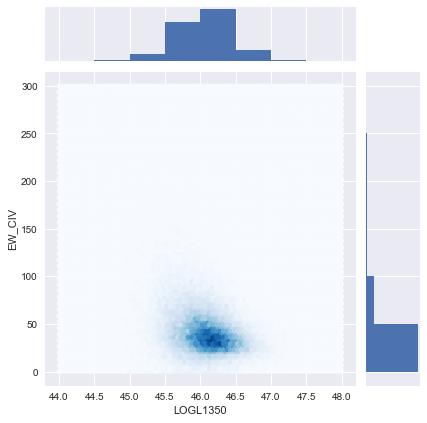

In [75]:
# More luminous quasars have weaker lines ("Baldwin effect")
#g = sns.jointplot(x='LOGL1350', y='EW_CIV', data=df, kind='scatter', xlim=(44,48), ylim=(10,1000))
g = sns.JointGrid(df['LOGL1350'], df['EW_CIV'], size=6)
g.ax_marg_x.hist(df['LOGL1350'], bins=np.arange(44, 48, 0.5))
g.ax_marg_y.hist(df['EW_CIV'], bins=np.arange(0, 300, 50), orientation="horizontal")
g.plot_joint(plt.hexbin, gridsize=80, extent=[44, 48, 0, 300], cmap="Blues")

LOGL1350
(44, 44.5]    2025.611145
(44.5, 45]    3990.984375
(45, 45.5]    4380.489990
(45.5, 46]    4673.169189
(46, 46.5]    5201.053223
(46.5, 47]    5878.919189
(47, 47.5]    6516.774170
Name: FWHM_CIV, dtype: float64


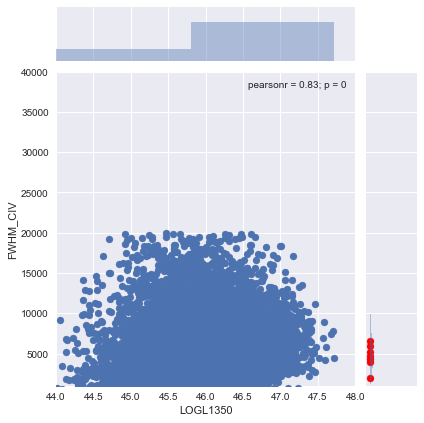

In [84]:
# More luminous quasars have broader lines
# Let's bin by redshift and calculate median quantities
Lbins = np.arange(44.0, 48, 0.5)
df_medians = df.groupby(pandas.cut(df['LOGL1350'], Lbins)).median()
print df_medians['FWHM_CIV']
df_medians.head()
g = sns.jointplot(x='LOGL1350', y='FWHM_CIV', data=df, kind='scatter', xlim=(44,48), ylim=(1000,4E4))

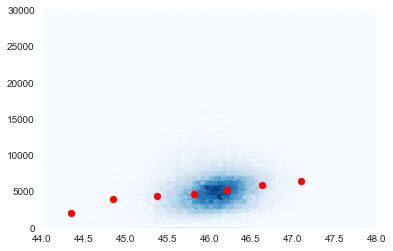

In [95]:
plt.hexbin(df['LOGL1350'], df['FWHM_CIV'], gridsize=80, extent=[44, 48, 0, 3E4], cmap='Blues')
plt.scatter(df_medians['LOGL1350'], df_medians['FWHM_CIV'], color='red')

In [37]:
df['LOGEDD_RATIO'].nlargest(20) # Super-Eddington accretion? (Logeddratio >0)

SDSS_NAME
092524.56+421729.6    1.218033
091044.90+261253.6    0.928180
112813.80+594213.4    0.899957
134722.83+465428.5    0.880831
103633.54+282821.0    0.852807
083920.53+352459.3    0.829610
094035.92+231750.8    0.823982
154109.57+184127.5    0.817728
124847.30+492008.2    0.814331
111523.24+082918.4    0.769279
002618.67+140946.6    0.762618
092436.70+664803.3    0.757261
163750.36+322313.8    0.756304
150631.75+113149.6    0.751186
121146.93+122419.0    0.747063
142623.36-002113.9    0.741206
113729.42+375224.2    0.739771
030449.85-000813.4    0.737017
142046.88+100206.3    0.735395
101152.70+245350.6    0.730380
Name: LOGEDD_RATIO, dtype: float64

**Exercise:**  Explore this dataset.  What trends can you find? Which are physically real, and which are selection effects (that only the most luminous quasars are detectable at higher redshift?)